# Taller  


### Resolver los siguientes problemas, por el metodo de la biseccion, newton, punto fijo y secante, realizar una comparación del error como función del las número de iteraciones


# 1. 
**Una particula parte del reposo sobre un plano inclinado uniforme, cuyo ángulo $\theta$ cambia con una rapidez constante de :**

**\begin{equation}
\frac{\mathrm{d}\theta}{\mathrm{d} t} = \omega < 0
\end{equation}**

**Al final de t segundos, la posición del objeto esta dada por:**


**\begin{equation}
x(t) = -\frac{g}{2\omega^2} \left( \frac{e^{\omega t}-e^{-\omega t}}{2} -\sin\omega t  \right) 
\end{equation}**

**Suponga que la partícula se desplazo 0.51m en 1s. Encuentre, con una exactitud de $10^{-5}$, la rapidez $\omega$ con que $\theta$ cambia. Suponga que $g=9.76m/s$**

Si consideramos que la partícula se desplazó 0.51m en 1s tenemos que $x(1) = 0.51$. Reemplazando en la ecuación nos queda que 

\begin{equation}
x(1) = 0.51 =  -\frac{g}{2\omega^2} \left( \frac{e^{\omega}-e^{-\omega }}{2} -\sin\omega t\right) 
\end{equation}

Luego, tenemos que: 

\begin{equation}
f(w) =  -\frac{g}{2\omega^2} \left( \frac{e^{\omega}-e^{-\omega }}{2} -\sin\omega   \right )  - 0.51 = 0  
\end{equation}

Ahora, encontrar los ceros de $f(\omega)$ corresponde a encontrar los valores de $\omega$ satisfacen la ecuación. Por tanto vamos a gráficar la función y a encontrar sus ceros por cada uno de los métodos. 

Ademas, hay que considerar que $\omega <0 $ de acuerdo al problema, por tanto vamos a buscar la raiz en un intervalo negativo. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

def f_ω(ω): 
    term1 = -g/(2*ω**2)
    term2 = (np.exp(ω) - np.exp(-ω))/2 - np.sin(ω)
    term3 = term1*term2  - 0.51
    return term3



Text(0, 0.5, 'f(ω)')

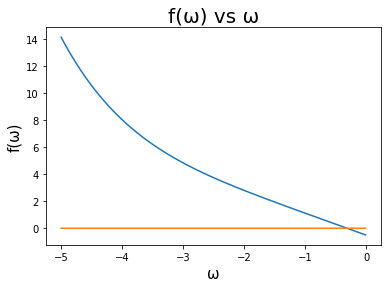

In [2]:
g = 9.76
ω = np.linspace(-5,-0.01,100000)
plt.plot(ω, f_ω(ω))
plt.plot(ω, np.zeros(len(ω)))
plt.title('f(ω) vs ω', size=20)
plt.xlabel('ω', size = 15)
plt.ylabel('f(ω)',size=15)

Para esta implementación vamos a hacer uso de los métodos vistos en clase usando scipy. En este caso como criterio de parada vamos a usar la convergencia aboluta (xtol) y para el caso de Newton y secante, la tolerancia de la función (tol).

### Por el método de la bisección: 

Vemos en la gráfica que la raiz está en el intervalo $[-1, -0.1]$ por tanto asignamos este intervalo para buscar la raiz. 

In [3]:
print('Usando la implementación de scipy de la secante ω = {:.5f} rad/s'.format(optimize.bisect(f_ω,-1,-0.1, xtol=1e-5)))
print('La función f(ω)evaluada en ω usando la implementación de scipy es f(ω) = {:.6f}'.format(f_ω(optimize.bisect(f_ω,-1,-0.1, xtol=1e-5))))

Usando la implementación de scipy de la secante ω = -0.31353 rad/s
La función f(ω)evaluada en ω usando la implementación de scipy es f(ω) = 0.000008


Evaluando la función $f(\omega)$ en $\omega$ podemos comprobar que hemos encontrado la raiz con la presición de $10^{-5}$ que era la deseada. 

### Por el método del punto fijo

En este caso vamos a reescribir la función $f(\omega)$ como $g(\omega) = \omega - f(\omega)$ y a graficar de nuevo




Text(0, 0.5, 'g(ω)')

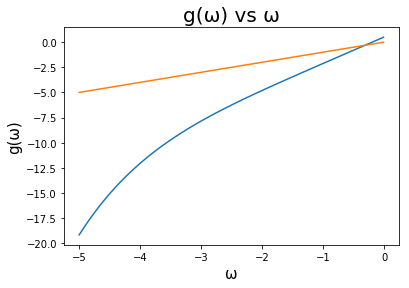

In [4]:
def g_ω(ω): 
    return ω - f_ω(ω)

ω = np.linspace(-5,-0.01,100)
plt.plot(ω, g_ω(ω))
plt.plot(ω,ω)
plt.title('g(ω) vs ω', size=20)
plt.xlabel('ω', size = 15)
plt.ylabel('g(ω)',size=15)


In [5]:
print('Usando la implementación de scipy del punto fijo ω = {:.5f} rad/s'.format(optimize.fixed_point(g_ω,-1, xtol=1e-5)))
print('La función g(w) evaluada en ω usando la implementación de scipy es f(ω) = {:.5f}'.format(g_ω(optimize.fixed_point(g_ω,-1, xtol=1e-5))))
print('La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = {:.16f}'.format(f_ω(optimize.fixed_point(g_ω,-1, xtol=1e-5))))

Usando la implementación de scipy del punto fijo ω = -0.31352 rad/s
La función g(w) evaluada en ω usando la implementación de scipy es f(ω) = -0.31352
La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = 0.0000000000000009


Como $\omega$ y $g(\omega)$ tienen el mismo valor concluimos que hemos encontrado el punto fijo, es decir, la raiz de $f(\omega)$

### Método de newton

Para el método de newton necesitamos la derivada analítica de la función $f(\omega)$, para esto vamos a usar lo visto en clase de sympy. 

In [6]:
import sympy as sym
from sympy.stats import Exponential

w = sym.Symbol('w')
g = sym.Symbol('g')

f_x = -g/(2*w**2)* (((sym.E**w - sym.E**-w)/2) -sym.sin(w)) - 0.51
f_x


-g*(exp(w)/2 - sin(w) - exp(-w)/2)/(2*w**2) - 0.51

In [7]:
sym.diff(f_x,w)


-g*(exp(w)/2 - cos(w) + exp(-w)/2)/(2*w**2) + g*(exp(w)/2 - sin(w) - exp(-w)/2)/w**3

In [8]:
g = 9.76
def df_ω(ω):
    term1 = -g*(np.exp(ω)/2 + np.exp(-ω)/2 - np.cos(ω))/(2*ω**2)
    term2 =  g*(np.exp(ω)/2 - np.exp(-ω)/2 - np.sin(ω))/(ω**3)
    return term1 + term2
    

In [9]:
print('Usando la implementación de scipy de Newton ω = {:.5f} rad/s'.format(optimize.newton(f_ω,-1,df_ω ,tol=1e-5)))
print('La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = {:.15f}'.format(f_ω(optimize.newton(f_ω,-1,df_ω, tol=1e-5))))

Usando la implementación de scipy de Newton ω = -0.31352 rad/s
La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = -0.000000000000002


### Por último el método de la secante: 

In [10]:
print('Usando la implementación de scipy de la secante ω = {:.5f} rad/s'.format(optimize.newton(f_ω,-1, tol=1e-5)))
print('La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = {:.12f}'.format(f_ω(optimize.newton(f_ω,-1, tol=1e-5))))

Usando la implementación de scipy de la secante ω = -0.31352 rad/s
La función f(w) evaluada en ω usando la implementación de scipy es f(ω) = 0.000000000008


### Resumen y comparación





In [11]:
b = optimize.bisect(f_ω,-1,-0.1,xtol=1e-5,full_output=True)
p = optimize.fixed_point(g_ω,-1,xtol=1e-5,) # El metodo de punto fijo no retorna el numero de iteraciones véase optimize.fixed_point?
n = optimize.newton(f_ω,-1,df_ω,tol=1e-5,full_output=True)
s = optimize.newton(f_ω,-1,tol=1e-5,full_output=True)
print('\033[1m Método        Raíz       Iteraciones     Error absoluto                    Criterio de parada \033[0m')
print('Bisección      {:.6f}        {}          {:.16f}               xtol = 1e-5'.format(b[0],b[1].iterations,f_ω(b[0])))
print('Punto fijo     {:.6f}        {}          {:.16f}               xtol = 1e-5'.format(p,'--',f_ω(g_ω(p))))
print('Newton         {:.6f}        {}           {:.16f}               tol = 1e-5'.format(n[0],n[1].iterations,abs(f_ω(n[0]))))
print('Secante        {:.6f}        {}           {:.16f}               tol = 1e-5'.format(s[0],s[1].iterations,abs(f_ω(s[0]))))


 Método        Raíz       Iteraciones     Error absoluto                    Criterio de parada 
Bisección      -0.313526        17          0.0000084097613000               xtol = 1e-5
Punto fijo     -0.313521        --          0.0000000000000009               xtol = 1e-5
Newton         -0.313521        3           0.0000000000000020               tol = 1e-5
Secante        -0.313521        3           0.0000000000083977               tol = 1e-5



# 2.
**Determinar el ángulo del segmento circular que es igual a un cuarto del área de la circunferencia** 


Como se dedujó en clase, la ecuación que rige el problema es: 



\begin{equation}
f(\theta) =\theta - \sin \theta - \frac{\pi}{2}=0
\end{equation}

Vamos a crear una función de python para la función $f(\theta)$, para $g(\theta)$ y para su derivada $f'(\theta)$

In [12]:
f_θ = lambda θ: θ - np.sin(θ) - np.pi/2
g_θ = lambda θ: θ - f_θ(θ)
df_θ = lambda θ: 1 - np.cos(θ)

Gráficamos para saber en donde seleccionar los intervalos y puntos:

Text(0, 0.5, 'f(θ)')

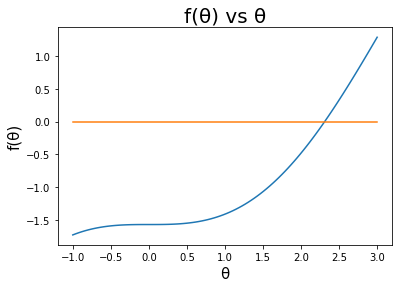

In [13]:
θ = np.linspace(-1,3,100)
plt.plot(θ, f_θ(θ))
plt.plot(θ, np.zeros(len(θ)))
plt.title('f(θ) vs θ', size=20)
plt.xlabel('θ', size = 15)
plt.ylabel('f(θ)',size=15)

Text(0, 0.5, 'g(θ)')

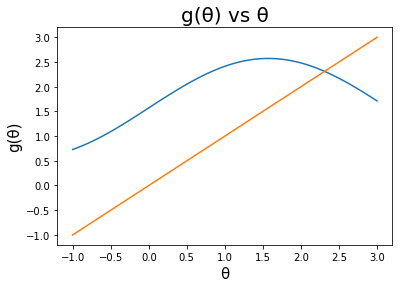

In [14]:
θ = np.linspace(-1,3,100)
plt.plot(θ, g_θ(θ))
plt.plot(θ, θ)
plt.title('g(θ) vs θ', size=20)
plt.xlabel('θ', size = 15)
plt.ylabel('g(θ)',size=15)

Encontramos las raíces y comparamos

In [15]:
b = optimize.bisect(f_θ,2,2.5,xtol=1e-5,full_output=True)
p = optimize.fixed_point(g_θ,2,xtol=1e-5)
n = optimize.newton(f_θ,2,df_θ,tol=1e-5,full_output=True)
s = optimize.newton(f_θ,2,tol=1e-5,full_output=True)

print('\033[1m Método        Raíz       Iteraciones     Error absoluto                    Criterio de parada \033[0m')
print('Bisección      {:.6f}        {}          {:.16f}               xtol = 1e-5'.format(b[0],b[1].iterations,f_θ(b[0])))
print('Punto fijo     {:.6f}        {}          {:.16f}               xtol = 1e-5'.format(p,'--',f_θ(g_θ(p))))
print('Newton         {:.6f}        {}           {:.16f}               tol = 1e-5'.format(n[0],n[1].iterations,abs(f_θ(n[0]))))
print('Secante        {:.6f}        {}           {:.16f}               tol = 1e-5'.format(s[0],s[1].iterations,abs(f_θ(s[0]))))


 Método        Raíz       Iteraciones     Error absoluto                    Criterio de parada 
Bisección      2.309883        16          0.0000027742903117               xtol = 1e-5
Punto fijo     2.309881        --          0.0000000000000004               xtol = 1e-5
Newton         2.309881        4           0.0000000000000004               tol = 1e-5
Secante        2.309881        5           0.0000000000000404               tol = 1e-5


# 3. 
**Resolver la siguiente situación**

**En el diseño de los vehiculos para todo tipo de terreno,  es necesario tener encuentra fallas cuando se trata de liberar dos tipos de obstáculos. Una es la falla por rozamiento, y ocurre cuando el vehiculo 
intenta cruzar un obstáculo que hace que su fondo toque el suelo. La otra recibie el nombre de falla por colision de la defensa delantera y ocurre cuando el vehiculo desciende por una zanja y la defensa delantera toca el suelo.**



**La figura muestra las componentes asociados al segundo tipo  de falla. En ella se indeca el ángulo máximo $\alpha$ que puede alcanzar un vehiculo cuando $\beta$ es el angulo maximo en que no ocurre la falla 
por rozamiento y satisface la siguiente ecuación:**


**\begin{equation}
A \sin(\alpha) \cos(\alpha)+B \sin^2(\alpha) - C \cos(\alpha) -  E  \sin(\alpha)=0
\end{equation}**

**donde; 
\begin{equation}
A = l \sin(\beta)
\end{equation}**

**\begin{equation}
B = l \cos(\beta)
\end{equation}
\begin{equation}
C = (h + 0.5 D )\sin(\beta) - 0.5 D \tan(\beta)
\end{equation}**

**\begin{equation}
E = (h + 0.5 D ) \cos(\beta) - 0.5 * D
\end{equation}**


**Para $l=89$ , $h=49$ , $D=55$, $\beta=11.5 °$ , el angulo se aproximara a 33°. Verificar este resultados**


Vamos a realizar los mismos procedimientos que en los puntos anteriores, y de nuevo a usar sympy para encontrar la derivada analítica. 

In [30]:
a = sym.Symbol('a')
A = sym.Symbol('A')
B = sym.Symbol('B')
C = sym.Symbol('C')
E = sym.Symbol('E')

f_a = A*sym.sin(a)*sym.cos(a) + B*(sym.sin(a))**2 - C*sym.cos(a) - E*sym.sin(a)
f_a


A*sin(a)*cos(a) + B*sin(a)**2 - C*cos(a) - E*sin(a)

In [33]:
sym.diff(f_a, a)

-A*sin(a)**2 + A*cos(a)**2 + 2*B*sin(a)*cos(a) + C*sin(a) - E*cos(a)

In [73]:
l=89
h=49
D=55
β=np.deg2rad(11.5)

A = l * np.sin(β)
B = l * np.cos(β)
C = (h + 0.5 * D) * np.sin(β) - 0.5 * D * np.tan(β)
E = (h + 0.5 * D) * np.cos(β) - 0.5 * D

f_α = lambda α: A*np.sin(α)*np.cos(α) + B*(np.sin(α))**2 - C*np.cos(α) - E*np.sin(α)
g_α = lambda α: α - f_α(α)
df_α = lambda α: -A*(np.sin(α))**2 + A*(np.cos(α))**2 + 2*B*np.sin(α)*np.cos(α) + C*np.sin(α) - E*np.cos(α)


Text(0, 0.5, 'f(α)')

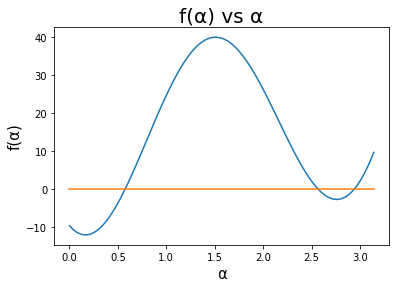

In [74]:
α = np.linspace(0,np.pi,100)
plt.plot(α, f_α(α))
plt.plot(α, np.zeros(len(α)))
plt.title('f(α) vs α', size=20)
plt.xlabel('α', size = 15)
plt.ylabel('f(α)',size=15)

Text(0, 0.5, 'g(α)')

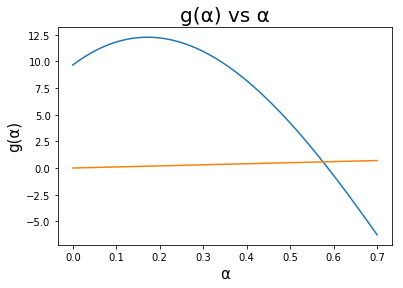

In [86]:
α = np.linspace(0,0.7,100)
plt.plot(α, g_α(α))
plt.plot(α, α)
plt.title('g(α) vs α', size=20)
plt.xlabel('α', size = 15) 
plt.ylabel('g(α)',size=15)

In [126]:
b = optimize.bisect(f_α,0.5,1,xtol=1e-5,full_output=True)
p = optimize.fixed_point(g_α,0.56,xtol=1e-5) # En este caso el método de punto fijo es muy sensible al punto inicial
n = optimize.newton(f_α,0.5,df_α,tol=1e-5,full_output=True)
s = optimize.newton(f_α,0.5,tol=1e-5,full_output=True)

print('\033[1m Método        Raíz (rad)       Raíz(°)       Iteraciones     Error absoluto(rad)     Criterio de parada \033[0m')
print('Bisección      {:.6f}        {:6f}        {}          {:.16f}             xtol = 1e-5'.format(b[0], np.rad2deg(b[0]),b[1].iterations,f_α(b[0])))
print('Punto fijo     {:.6f}        {:6f}        {}          {:.16f}             xtol = 1e-5'.format(p,np.rad2deg(p),'--',f_α(g_α(p))))
print('Newton         {:.6f}        {:6f}        {}           {:.16f}              tol = 1e-5'.format(n[0],np.rad2deg(n[0]),n[1].iterations,abs(f_α(n[0]))))
print('Secante        {:.6f}        {:6f}        {}           {:.16f}              tol = 1e-5'.format(s[0],np.rad2deg(s[0]),s[1].iterations,abs(f_α(s[0]))))


 Método        Raíz (rad)       Raíz(°)       Iteraciones     Error absoluto(rad)     Criterio de parada 
Bisección      0.575478        32.972438        16          0.0002399832936852             xtol = 1e-5
Punto fijo     0.575473        32.972175        --          0.0000000000417515             xtol = 1e-5
Newton         0.575473        32.972175        4           0.0000000000000000              tol = 1e-5
Secante        0.575473        32.972175        4           0.0000000149368979              tol = 1e-5


# 4. 

**Construir un fractal empleando el metodo de Newton-Raphson, 
(Reproducir código y entender)
\begin{equation}
z_{n+1} = z_n -a \frac{f(z)}{f'(z)} 
\end{equation}**



**\begin{equation}
f'(z) = \frac{ f(z+h)+f(z) }{h}
\end{equation}**

En este caso, en este código se está representando la solución de encontrar las raices de una función, pero en este caso, una función compleja, usando el método de Newton-Raphson. El fractal representa el espacio de las soluciones en donde, se puede observar que hay una simetría. La ecuación es un polinomio en variable compleja elevado a la 3, en este caso, por el teórema fundamental del álgebra, se tienen 3 raices. En la imagen justo se representan estas 3 raices y se ve que la imagen esta divida en 3 partes, presentando una simetria correspondiente a estas 3 raíces. 

In [20]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image


In [21]:
Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin


In [25]:
#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h
  


In [26]:
a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)
    
      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 
          
        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16
      
      image.putpixel((x,y), (r,g,b) )


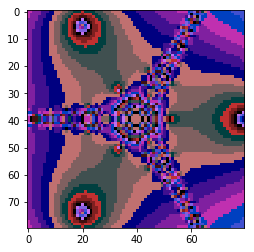

In [27]:
plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)
